# Lab 8: Define and Solve an ML Problem of Your Choosing

In [15]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [16]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Census Data
2. Model predicts whether an individual earns above or below 50k per year. Label = 'income_binary'
3. Supervised learning, binary classification.
4. features: age, workclass, education, marital status, occupation, relationship, capital gain, capital loss, hours-per-week.
5. A model predicting income levels help companies tailor their marketing strategies to specific income level groups, optimizing investment decisions and enabling personalized customer services. The model ensures ethical decision making by removing features such as race, native country, and sex to fairly addrress income related disparities.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [17]:
# YOUR CODE HERE
print(list(df.columns))

df.head(20)



['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


In [18]:
df = df.drop(columns = ['sex_selfID', 'race', 'native-country', 'fnlwgt'])
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40.0,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13.0,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40.0,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40.0,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40.0,<=50K


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Other than removing 'race', 'sex_selfID', and 'native-country', I also decided to remove fnlwgt to avoid complexities with weights of populations. The features I am keeping are: age, workclass, education, education-num, marital-status, occupation, relationship, capital-gain, capital-loss, hours-per-week.
2. I will use one-hot encoding to convert categorical variables into binary format and apply standard scaling to normalize my feature values. Missing values will be replaced with the mean of their respective features. To address extreme outliers, I will apply winsorizing to the feature values. I will build the neural network model by configuring the layers and activations, and incorporate L1 regularization to penalize large coefficients to enhance feature selection.
3. My neural network model would have 3 hidden layers with ReLU activation. The output layer would utilize a sigmoid activation function for this binary classification problem.
4. I will first build the model by setting up the layers, activations, and train the data by dividing my data into training, validation, and test sets. I will then fit the model to the training data and validate it using a validation set. Additionally, I will use K-Fold Cross-Validation to evaluate the model's performance across multiple subsets of the data. Performance metrics such as accuracy and precision will be then analyzed, and I will improve the model using Randomized Search to find optimal hyperparameters.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.


1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.



In [19]:

import scipy.stats as stats
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l1
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier



#winsorize 1% of numerical features: 

df['education-num'] = stats.mstats.winsorize(df['education-num'], limits = [0.01, 0.01])

df['capital-gain'] = stats.mstats.winsorize(df['capital-gain'], limits = [0.01, 0.01])

df['capital-loss'] = stats.mstats.winsorize(df['capital-loss'], limits = [0.01, 0.01])

df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits = [0.01, 0.01])

df.head()



,age,workclass,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40.0,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13.0,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40.0,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40.0,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40.0,<=50K


In [20]:
#check if there is missing data: 
nan_count = df.isnull().values.any()
print(nan_count)
#check how many missing vaues in each column

print('missing values in column age ', np.sum(df['age'].isnull(), axis = 0))
print('missing values in column education-num ',np.sum(df['education-num'].isnull(), axis = 0))
print('missing values in column hours-per-week ',np.sum(df['hours-per-week'].isnull(), axis = 0))
print('missing values in column capital-gain ',np.sum(df['capital-gain'].isnull(), axis = 0))
print('missing values in column capital-loss ',np.sum(df['capital-loss'].isnull(), axis = 0))

#replace missing values with the mean in column age:

df['age'].fillna(value = (df['age'].mean()), inplace = True)  
df['education-num'].fillna(value = (df['education-num'].mean()), inplace = True)  
df['hours-per-week'].fillna(value = (df['hours-per-week'].mean()), inplace = True) 
df['capital-gain'].fillna(value = (df['capital-gain'].mean()), inplace = True) 
df['capital-loss'].fillna(value = (df['capital-loss'].mean()), inplace = True)  
print(df.columns)


categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship']
df = df.dropna(subset = categorical_columns)


# Check for any remaining NaN values
nan_count = df.isnull().values.any()
print("NaN values in DataFrame after dropping rows with NaN in categorical columns: ", nan_count)



True
missing values in column age  162
missing values in column education-num  0
missing values in column hours-per-week  0
missing values in column capital-gain  0
missing values in column capital-loss  0
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary'],
      dtype='object')
NaN values in DataFrame after dropping rows with NaN in categorical columns:  False


In [21]:


# change string values into binary in place 
df['income_binary'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

# convert to float32 for tf
df['income_binary'] = df['income_binary'].astype('float32')

#one hot encoding:

df = pd.get_dummies(df, columns = categorical_columns)


In [22]:


X = df.drop(columns = ['income_binary'])
y = df['income_binary']
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

#normalizing feature values 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data into training, validation, test data sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)




In [23]:


#neural network model function
def model_build(learning_rate = 0.04, units1 = 64, units2 = 32, units3 = 16, l1_penalty = 0.01):
    
    nn_model = keras.Sequential()

    input_shape = X_train.shape[1]
    input_layer = keras.layers.InputLayer(input_shape)
    nn_model.add(input_layer)
    
    hidden_layer_1 = keras.layers.Dense(units = units1, activation = 'relu', kernel_regularizer = l1(l1_penalty))
    nn_model.add(hidden_layer_1)
    
    hidden_layer_2 = keras.layers.Dense(units = units2, activation = 'relu', kernel_regularizer = l1(l1_penalty))
    nn_model.add(hidden_layer_2)
    
    hidden_layer_3 = keras.layers.Dense(units = units3, activation = 'relu', kernel_regularizer = l1(l1_penalty))
    nn_model.add(hidden_layer_3)
    
    output_layer = keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_regularizer = l1(l1_penalty))
    nn_model.add(output_layer)
    
    # optimization function: stochastic gradient descent 
    
    sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.01)
    
    #define loss function 
    loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)
    
    #compile model 
    nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics = ['accuracy'])
    
    return nn_model 

#create the model 
nn_model = model_build()

In [24]:


param_dist = {
    'hidden_layer_sizes': [(32, 64, 16), (64, 32, 16), (32, 64, 32), (64, 32, 32)],
    'learning_rate_init': [0.001, 0.01, 0.04, 0.08, 0.1],
    'max_iter': [300],
    'early_stopping': [True],
    'validation_fraction': [0.1],
    'n_iter_no_change': [10]
}

# Randomized Search with K-Fold Cross-Validation
random_search = RandomizedSearchCV(estimator=MLPClassifier(), param_distributions=param_dist, n_iter=10, cv=3, verbose=1, scoring='accuracy', n_jobs=-1)
random_result = random_search.fit(X, y)

print(f'Best Hyperparameters: {random_result.best_params_}')

# Evaluate the best model with K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
conf_matrices = []
precisions = []
recalls = []
f1_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build and fit the best model
    model = random_result.best_estimator_
    model.fit(X_train, y_train)

    # Predict and compute metrics
    y_val_pred = model.predict(X_val)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    conf_matrices.append(conf_matrix)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Sum up confusion matrices 
total_conf_matrix = np.sum(conf_matrices, axis=0)

# Average metrics
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)


print(f'Total Confusion Matrix:\n{total_conf_matrix}')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1 Score: {average_f1}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'validation_fraction': 0.1, 'n_iter_no_change': 10, 'max_iter': 300, 'learning_rate_init': 0.04, 'hidden_layer_sizes': (32, 64, 32), 'early_stopping': True}
Total Confusion Matrix:
[[21440  1628]
 [ 2998  4652]]
Average Precision: 0.7411937046069683
Average Recall: 0.6082392828811282
Average F1 Score: 0.6677863445486326


In [25]:
#call back class to output info from our model while it is training 

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [26]:
#fit neural network model to training data

t0 = time.time()

num_epochs = 50

history = nn_model.fit(X_train, y_train, epochs = num_epochs, verbose = 0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)], validation_split = 0.2)

t1 = time.time()

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 50], Loss: 0.6056, Accuracy: 0.8392, Val_loss: 0.5478, Val_accuracy: 0.8395
Epoch [10/ 50], Loss: 0.4468, Accuracy: 0.8455, Val_loss: 0.4342, Val_accuracy: 0.8470
Epoch [15/ 50], Loss: 0.4223, Accuracy: 0.8461, Val_loss: 0.4129, Val_accuracy: 0.8437
Epoch [20/ 50], Loss: 0.4181, Accuracy: 0.8458, Val_loss: 0.4102, Val_accuracy: 0.8433
Epoch [25/ 50], Loss: 0.4167, Accuracy: 0.8459, Val_loss: 0.4079, Val_accuracy: 0.8444
Epoch [30/ 50], Loss: 0.4157, Accuracy: 0.8451, Val_loss: 0.4080, Val_accuracy: 0.8450
Epoch [35/ 50], Loss: 0.4149, Accuracy: 0.8453, Val_loss: 0.4056, Val_accuracy: 0.8450
Epoch [40/ 50], Loss: 0.4143, Accuracy: 0.8454, Val_loss: 0.4049, Val_accuracy: 0.8462
Epoch [45/ 50], Loss: 0.4140, Accuracy: 0.8453, Val_loss: 0.4055, Val_accuracy: 0.8454
Epoch [50/ 50], Loss: 0.4129, Accuracy: 0.8438, Val_loss: 0.4035, Val_accuracy: 0.8458
Elapsed time: 18.29s


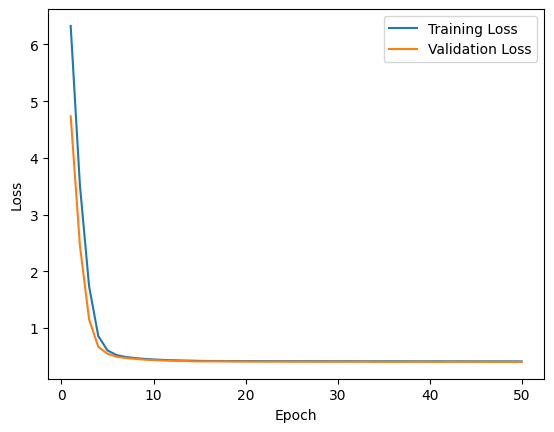

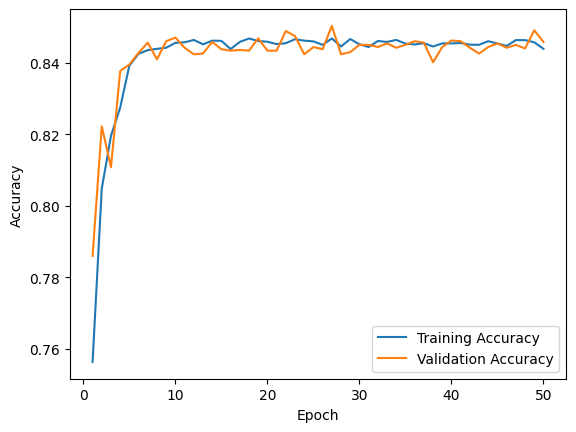

In [27]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Performance analysis: 

The model shows consistent training and validation accuracy throughout the number of epochs, with both staying above 84%. The loss values decrease throughout the number of epochs, indicating that the model is improving as it fits the data better over time. Training loss started at 0.6056 in epoch 5 and decreased to 0.4129 by epoch 50. Validation loss started at 0.5478 in epoch 5 and decreased to 0.4035 by epoch 50. Both training and validation accuracy increased throughout the 50 epochs, and both accuracies are very close, indicating that the model is not overfitting. 